In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

TensorFlow version: 2.9.1


In [2]:
# Read data and display data head
shopping = pd.read_csv('./online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Describe the dataset
shopping.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [4]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [5]:
# Checking for number of unique values for each feature

uniques = shopping.nunique()
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


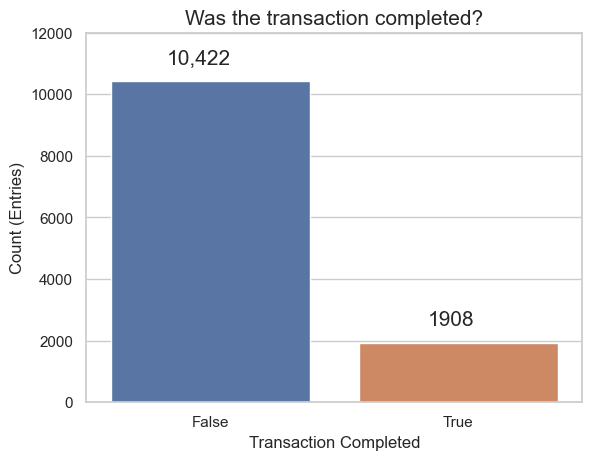

In [6]:
# Visualize the data

sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

(0.0, 4000.0)

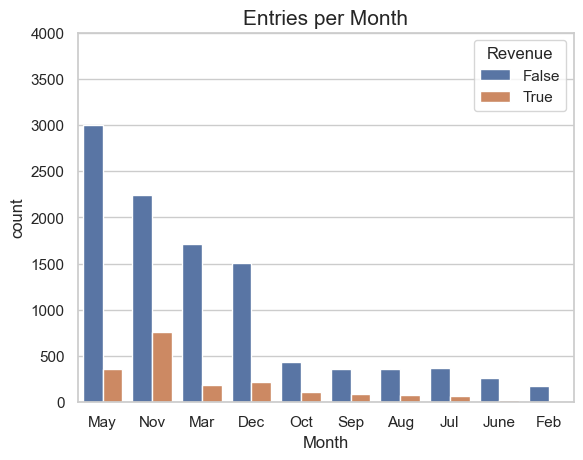

In [7]:
monthly = shopping['Month'].value_counts()

sns.countplot(shopping['Month'], order=monthly.index, hue=shopping['Revenue'])
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

In [8]:
shopping['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

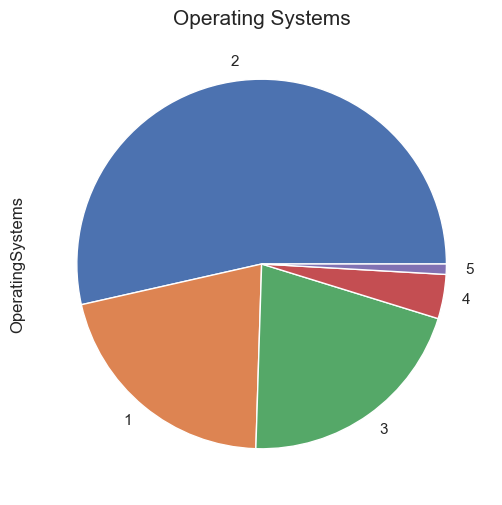

In [9]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

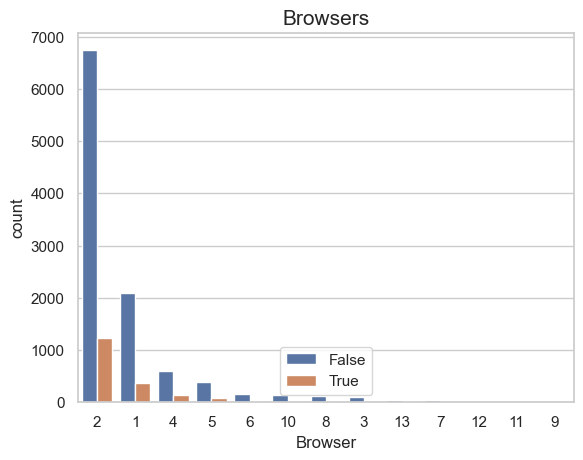

In [10]:
browsers = shopping['Browser'].value_counts()
sns.countplot(shopping['Browser'], order = browsers.index, hue=shopping['Revenue'])
plt.title('Browsers', fontsize=15)
plt.legend()

plt.show()

In [11]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [12]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [13]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [14]:
# import XGBoost
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [15]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
         
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
model = xgb_clf.fit(X_train, y_train)

In [16]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, ...)


In [17]:
y_pred = xgb_clf.predict(X_test)

In [18]:
# make prediction using our test data and model
y_pred_etc = xgb_clf.predict(X_test)
y_prob_rfc = xgb_clf.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.42


The area under the ROC curve is: 0.89


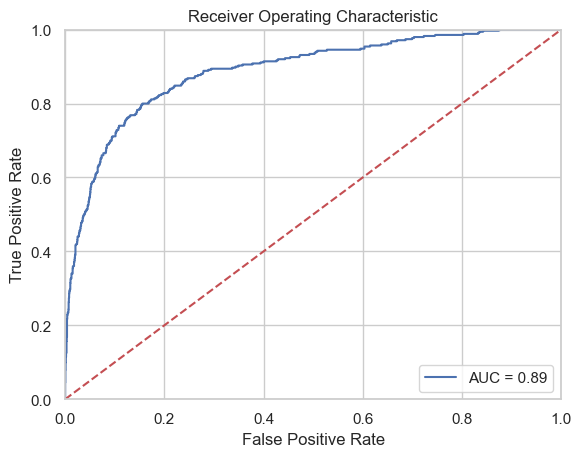

In [19]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

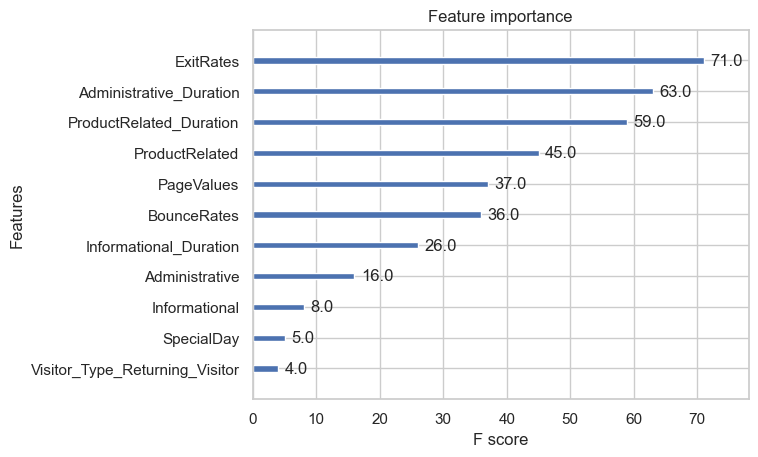

In [20]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

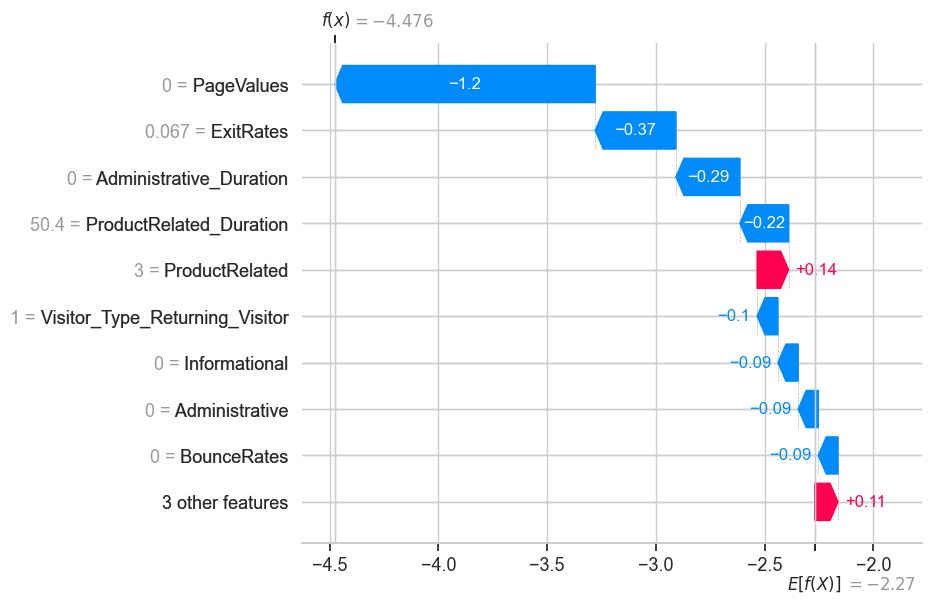

In [21]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [22]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)


In [23]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = Dense(64, activation='relu')
        self.d2 = Dense(128, activation='relu')
        self.d3 = Dense(256, activation='relu')
        self.d4 = Dense(1)

    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return self.d4(x)

# Create an instance of the model
model = MyModel()

In [24]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [25]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

In [26]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [27]:
@tf.function
def test_step(images, labels):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)
    return predictions

In [28]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        preds = test_step(test_images, test_labels)

    print(
        f'Epoch {epoch + 1}, '
        f'Loss: {train_loss.result()}, '
        f'Accuracy: {train_accuracy.result() * 100}, '
        f'Test Loss: {test_loss.result()}, '
        f'Test Accuracy: {test_accuracy.result() * 100}'
      )


Epoch 1, Loss: 3.085404396057129, Accuracy: 79.52149200439453, Test Loss: 0.9201052784919739, Test Accuracy: 87.75344848632812
Epoch 2, Loss: 1.2878309488296509, Accuracy: 83.54622650146484, Test Loss: 0.7455161213874817, Test Accuracy: 81.3868637084961
Epoch 3, Loss: 0.7638520002365112, Accuracy: 85.37104797363281, Test Loss: 0.5509875416755676, Test Accuracy: 88.03730773925781
Epoch 4, Loss: 0.498929500579834, Accuracy: 86.1009750366211, Test Loss: 0.6127865314483643, Test Accuracy: 87.87510681152344
Epoch 5, Loss: 0.4168764352798462, Accuracy: 86.72952270507812, Test Loss: 0.34241586923599243, Test Accuracy: 88.2806167602539
Epoch 6, Loss: 0.38875794410705566, Accuracy: 86.86131286621094, Test Loss: 0.4774012565612793, Test Accuracy: 87.30738067626953
Epoch 7, Loss: 0.35295653343200684, Accuracy: 87.21614074707031, Test Loss: 0.3102337718009949, Test Accuracy: 88.36172485351562
Epoch 8, Loss: 0.3337703049182892, Accuracy: 86.75993347167969, Test Loss: 0.31522879004478455, Test Accur

In [29]:
preds

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.9026675],
       [-1.7891197]], dtype=float32)>

In [30]:
model.evaluate(test_ds, return_dict=True)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
predictions = model(test_ds, training=False)


In [37]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.fit(X_train.values, y_train.values, epochs=10, validation_split=0.1)

Epoch 1/10
278/278 [==============================] - 2s 7ms/step - loss: 3.3422 - accuracy: 0.7981 - val_loss: 1.4057 - val_accuracy: 0.8308
Epoch 2/10
278/278 [==============================] - 2s 6ms/step - loss: 0.6145 - accuracy: 0.8511 - val_loss: 0.4201 - val_accuracy: 0.8531
Epoch 3/10
278/278 [==============================] - 2s 6ms/step - loss: 0.4122 - accuracy: 0.8659 - val_loss: 0.3672 - val_accuracy: 0.8521
Epoch 4/10
278/278 [==============================] - 2s 7ms/step - loss: 0.3817 - accuracy: 0.8643 - val_loss: 0.4288 - val_accuracy: 0.8430
Epoch 5/10
278/278 [==============================] - 3s 10ms/step - loss: 0.3612 - accuracy: 0.8655 - val_loss: 0.3744 - val_accuracy: 0.8622
Epoch 6/10
278/278 [==============================] - 2s 7ms/step - loss: 0.3256 - accuracy: 0.8674 - val_loss: 0.3705 - val_accuracy: 0.8703
Epoch 7/10
278/278 [==============================] - 2s 6ms/step - loss: 0.3325 - accuracy: 0.8666 - val_loss: 0.4279 - val_accuracy: 0.8470
Epoch

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest accuracy:', test_acc)


78/78 [==============================] - 0s 4ms/step - loss: 0.9350 - accuracy: 0.8861

Test accuracy: 0.886050283908844


In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [35]:
y_test1 = list(map(int, y_test))

In [36]:
predictions = probability_model.predict(y_test1)


ValueError: in user code:

    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None
